# Simpel Linear Regression - Advertising Spending

# Problem Statement

Determine "IS there a relationship between total advertising spend and sales?

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
df = pd.read_csv('Advertising.csv')

In [84]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [86]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [87]:
df.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [88]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [89]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

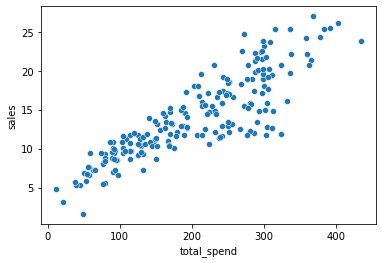

In [90]:
sns.scatterplot(data=df, x='total_spend', y='sales')

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

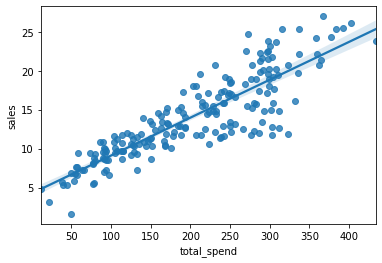

In [91]:
sns.regplot(data=df, x='total_spend', y='sales')

In [92]:
X = df['total_spend']
y = df['sales']

In [93]:
#y = mx + b

#y = B1x + B0  beta coefficient

#help(np.polyfit)

In [94]:
np.polyfit(X, y, deg =1)

array([0.04868788, 4.24302822])

In [95]:
potential_spend = np.linspace(0, 500, 100)

In [96]:
#y = B1x + B0  beta coefficient
predicted_sales = 0.04868788*potential_spend + 4.24302822

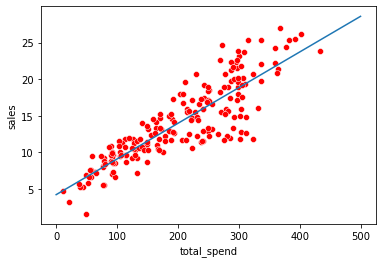

In [97]:
sns.scatterplot(data=df, x='total_spend', y = 'sales', color='red')
plt.plot(potential_spend, predicted_sales)

In [98]:
spend = 200

predicted_sales = 0.04868788*spend + 4.24302822

In [99]:
predicted_sales

13.98060422

In [100]:
np.polyfit(X, y,deg =3) #deg = 3rd polynomial degree

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [101]:
# y = B1x + B0

# y = B3**3 +B2*x**2 + B1x + B0

In [102]:
pot_spend = np.linspace(0, 500, 100)

In [103]:
# y = B3**3 +B2*x**2 + B1x + B0

pred_sales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend + 2.70495053e+00

In [104]:
pred_sales

array([ 2.70495053,  3.11474825,  3.51512186,  3.90630911,  4.28854779,
        4.66207567,  5.02713053,  5.38395013,  5.73277224,  6.07383466,
        6.40737513,  6.73363145,  7.05284138,  7.3652427 ,  7.67107318,
        7.97057059,  8.2639727 ,  8.5515173 ,  8.83344215,  9.10998503,
        9.38138371,  9.64787596,  9.90969955, 10.16709227, 10.42029188,
       10.66953616, 10.91506288, 11.15710981, 11.39591473, 11.63171541,
       11.86474963, 12.09525515, 12.32346975, 12.54963121, 12.77397729,
       12.99674578, 13.21817443, 13.43850104, 13.65796337, 13.87679919,
       14.09524628, 14.31354241, 14.53192536, 14.75063289, 14.96990278,
       15.18997281, 15.41108075, 15.63346437, 15.85736144, 16.08300974,
       16.31064705, 16.54051112, 16.77283975, 17.0078707 , 17.24584174,
       17.48699065, 17.73155521, 17.97977318, 18.23188233, 18.48812045,
       18.74872531, 19.01393467, 19.28398632, 19.55911802, 19.83956755,
       20.12557268, 20.41737119, 20.71520085, 21.01929943, 21.32

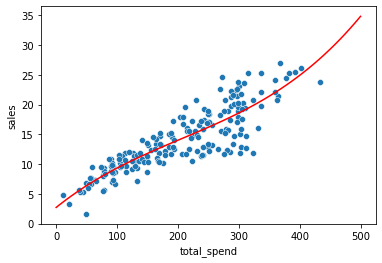

In [105]:
sns.scatterplot(data=df, x='total_spend', y = 'sales')
plt.plot(pot_spend, pred_sales, color='red')

# Expanding the Questions

Previously, we explored Is there a relationship between total advertising spend and sales? as well as predicting the total sales for some value of total spend. Now we want to expand this to What is the relationship between each advertising channel (TV,Radio,Newspaper) and sales?

# Multiple Features (N-Dimensional)

# Problem Statement

We want to expand this to 'What is the relationship between each advertising channel (TV, Radio, Newspaper) and sales?

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Advertising.csv")

df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


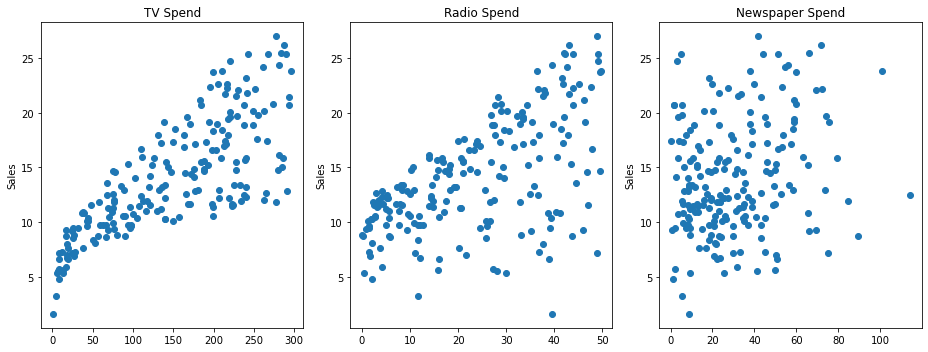

In [107]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(13, 5))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

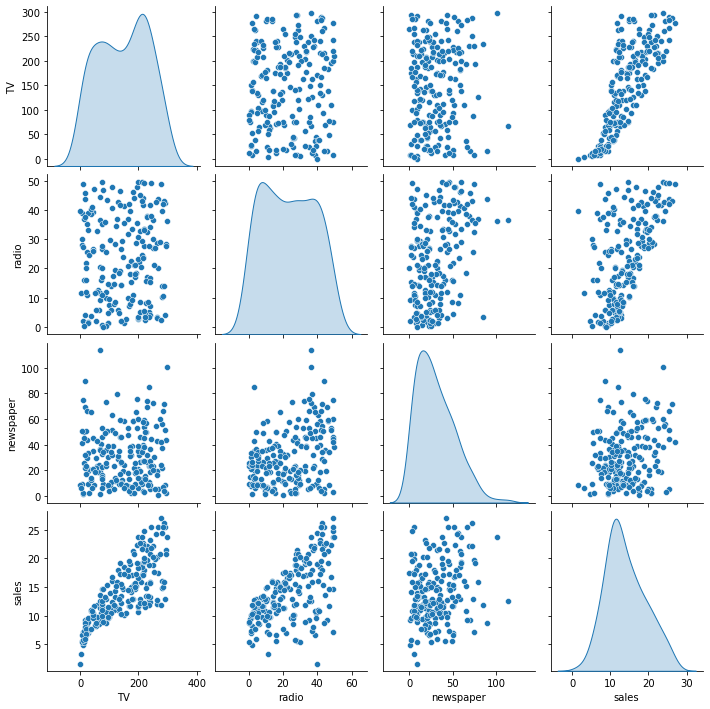

In [108]:
# Relationships between features
sns.pairplot(df,diag_kind='kde')

In [109]:
X = df.drop('sales',axis=1)
y = df['sales']

In [110]:
# Train and Test Spli
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 
# random_state for shuffling the datasets for testing and training

In [111]:
X_train.shape

(140, 3)

In [112]:
y_train.shape

(140,)

In [113]:
X_test.shape

(60, 3)

In [114]:
y_test.shape

(60,)

In [115]:
len(df)

200

In [116]:
len(X_test)

60

# Creating a Model (Estimator)

In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
#### Fit/Train the Model on the training data

##**Make sure you only fit to the training data, in order to fairly evaluate your model's performance on future data**

#help(LinearRegression)

model = LinearRegression()# Creting Insatnce

model.fit(X_train, y_train)

LinearRegression()

In [119]:
model.predict(X_test)

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

# Performance Evaluation

In [120]:
test_predictions =model.predict(X_test) # y_test

In [121]:
#X_test.head()

In [122]:
#y_test

In [123]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [124]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [125]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

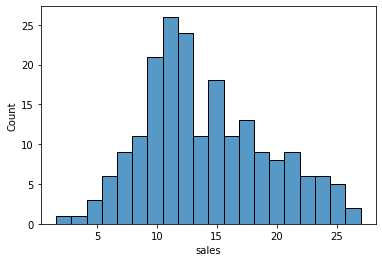

In [126]:
sns.histplot(data = df, x='sales', bins =20)

In [127]:
mean_absolute_error(y_test, test_predictions)

1.213745773614481

In [128]:
mean_squared_error(y_test, test_predictions)

2.2987166978863787

In [129]:
#RMSE
np.sqrt(mean_squared_error(y_test, test_predictions))

1.5161519375993882

# Evaluating Residuals

In [131]:
test_residuals = y_test - test_predictions

In [132]:
test_residuals

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

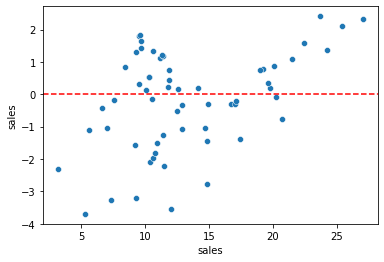

In [135]:
sns.scatterplot(x=y_test, y= test_residuals)
plt.axhline(y=0, color = 'r', ls ='--')

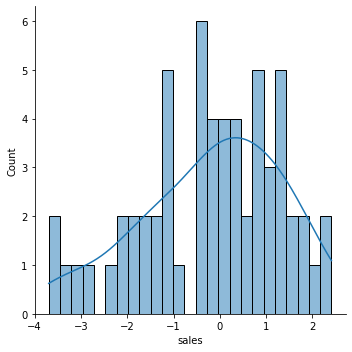

In [137]:
sns.displot(test_residuals, bins =25, kde =True)

In [138]:
import scipy as sp

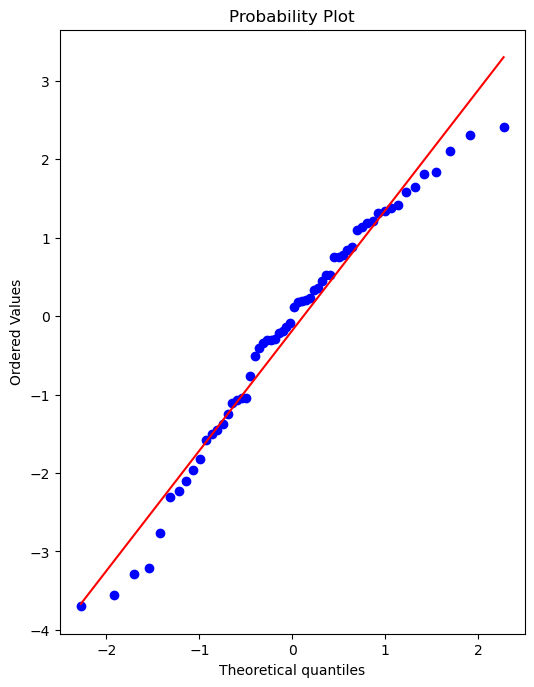

In [140]:
# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6, 8), dpi =100)
#probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_residuals, plot =ax)

# Model Deployment

In [141]:
final_model = LinearRegression()

In [142]:
final_model.fit(X,y)

LinearRegression()

In [145]:
final_model.coef_ # Coefficients for TV	radio	newspaper)

array([ 0.04576465,  0.18853002, -0.00103749])

In [144]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [146]:
y_hat = final_model.predict(X)

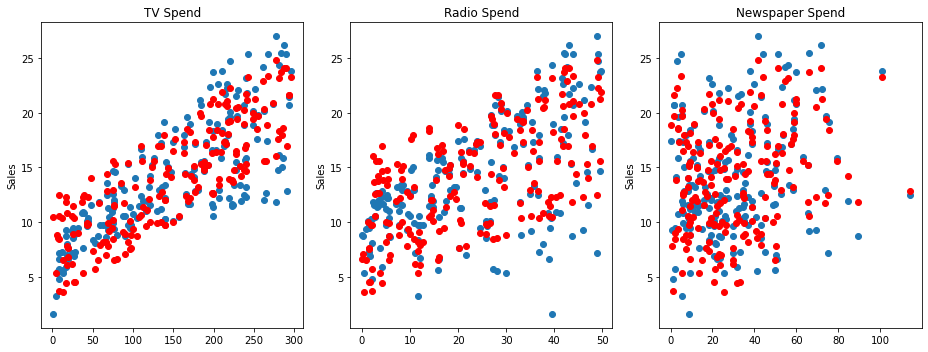

In [147]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(13, 5))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat, 'o', color ='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat, 'o', color ='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat, 'o', color ='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [148]:
from joblib import dump, load

In [149]:
dump(final_model, 'final_sales_model.joblib')

['final_sales_model.joblib']

In [150]:
loaded_model = load('final_sales_model.joblib')

In [151]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [152]:
X.shape

(200, 3)

# Prediction

In [154]:
#149 TV, 22 radio, 12 Newspaper
# Sales?
campaign = [[149, 22, 12]]

In [155]:
loaded_model.predict(campaign)

array([13.893032])